In [41]:
!pip install common.utils

  Using cached https://files.pythonhosted.org/packages/66/47/e24fa255e0409f040a7c5776f2b0bd85320a9c8d986a8a5a6ef8dcb54e45/common_utils-2.0.1.dev1-py2.py3-none-any.whl


In [42]:
import time 
from sklearn import metrics 
import pickle as pickle 
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image  
import pydotplus
import os

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']   #设置简黑字体
mpl.rcParams['axes.unicode_minus'] = False # 解决‘-’bug
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [43]:
cancer = load_breast_cancer() #载入数据
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target'] = cancer.target

x = cancer.data
y = cancer.target

print('data:',x.shape)
print('target:',y.shape)

# 打印前五行数据
df.head()


data: (569, 30)
target: (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
data: (569, 30)
target: (569,)


In [45]:
# 查看数据描述

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [46]:
# 打印数据类别及每种类别的个数
df['target'].value_counts()


1    357
0    212
Name: target, dtype: int64

In [47]:
# 查看对数值属性的概括

df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27f0c30290>,
      dtype=object)

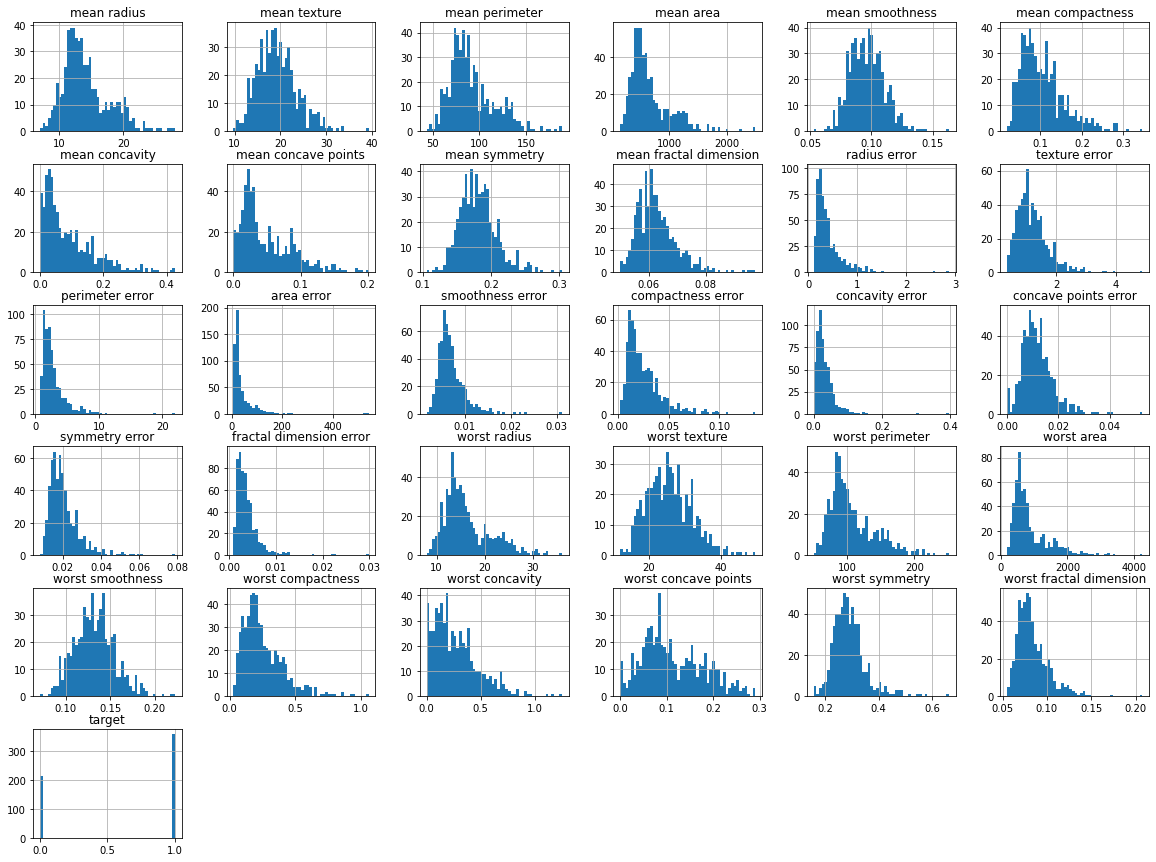

In [48]:
# 画出数据分布直方图
df.hist(bins=50,figsize=(20,15))


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)


In [50]:
df_train = pd.DataFrame(x_train,columns=cancer.feature_names)
df_train['target'] = y_train

df_train


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.230800,0.14100,0.1797,0.05506,1.0090,0.9245,6.4620,164.100,0.006292,0.019710,0.035820,0.013010,0.01479,0.003118,30.67,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738,0
1,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.0900,1.6480,16.800,0.012910,0.022220,0.004174,0.007082,0.02572,0.002278,10.65,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1
2,11.20,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.00000,0.1060,0.05502,0.3141,3.8960,2.0410,22.810,0.007594,0.008878,0.000000,0.000000,0.01989,0.001773,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1
3,12.67,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.02107,0.1707,0.05984,0.2100,0.9505,1.5660,17.610,0.006809,0.009514,0.013290,0.006474,0.02057,0.001784,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888,1
4,15.05,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.04335,0.1561,0.05915,0.3860,1.1980,2.6300,38.490,0.004952,0.016300,0.029670,0.009423,0.01152,0.001718,17.58,28.06,113.80,967.0,0.12460,0.21010,0.28660,0.11200,0.2282,0.06954,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.11980,0.2113,0.07115,0.4030,0.7747,3.1230,41.510,0.007159,0.037180,0.061650,0.010510,0.01591,0.005099,20.80,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980,0
377,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.168400,0.10800,0.2152,0.06673,0.9806,0.5505,6.3110,134.800,0.007940,0.058390,0.046580,0.020700,0.02591,0.007054,22.39,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080,0
378,10.26,16.58,65.85,320.8,0.08877,0.08066,0.043580,0.02438,0.1669,0.06714,0.1144,1.0230,0.9887,7.326,0.010270,0.030840,0.026130,0.010970,0.02277,0.005890,10.83,22.04,71.08,357.4,0.14610,0.22460,0.17830,0.08333,0.2691,0.09479,1
379,13.86,16.93,90.96,578.9,0.10260,0.15170,0.099010,0.05602,0.2106,0.06916,0.2563,1.1940,1.9330,22.690,0.005960,0.034380,0.039090,0.014350,0.01939,0.004560,15.75,26.93,104.40,750.1,0.14600,0.43700,0.46360,0.16540,0.3630,0.10590,0


In [51]:
df_test = pd.DataFrame(x_test,columns=cancer.feature_names)
df_test['target'] = y_test

df_test


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.01521,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,1
1,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,0.2094,0.05581,0.9553,1.1860,6.487,124.40,0.006804,0.03169,0.034460,0.017120,0.01897,0.004045,25.73,28.64,170.30,2009.0,0.1353,0.32350,0.36170,0.18200,0.3070,0.08255,0
2,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.044970,0.017160,0.01590,0.003053,31.01,34.51,206.00,2944.0,0.1481,0.41260,0.58200,0.25930,0.3103,0.08677,0
3,10.17,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020,1
4,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,0.4212,1.4330,2.765,45.81,0.005444,0.01169,0.016220,0.008522,0.01419,0.002751,20.92,34.69,135.10,1320.0,0.1315,0.18060,0.20800,0.11360,0.2504,0.07948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,0.2213,1.2850,1.535,17.26,0.005608,0.01646,0.015290,0.009997,0.01909,0.002133,13.75,25.99,87.82,579.7,0.1298,0.18390,0.12550,0.08312,0.2744,0.07238,1
184,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,0.06669,0.2073,1.8050,1.377,19.08,0.014960,0.02121,0.014530,0.015830,0.03082,0.004785,11.35,16.82,72.01,396.5,0.1216,0.08240,0.03938,0.04306,0.1902,0.07313,1
185,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,0.5196,1.9180,3.564,33.00,0.008263,0.01870,0.012770,0.005917,0.02466,0.002977,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626,1
186,14.47,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,0.2542,1.0790,2.615,23.11,0.007138,0.04653,0.038290,0.011620,0.02068,0.006111,16.22,31.73,113.50,808.9,0.1340,0.42020,0.40400,0.12050,0.3187,0.10230,1


# 创建模型

In [52]:
# Multinomial Naive Bayes Classifier 
def mul_naive_bayes_classifier(train_x, train_y): 
    model = MultinomialNB(alpha=0.01) 
    model.fit(train_x, train_y) 
    return model 

def naive_bayes_classifier(train_x, train_y): 
    model = GaussianNB(priors=None)
    model.fit(train_x, train_y) 
    return model 

# KNN Classifier 
def knn_classifier(train_x, train_y): 
    model = KNeighborsClassifier() 
    model.fit(train_x, train_y) 
    return model 

# Logistic Regression Classifier 
def logistic_regression_classifier(train_x, train_y): 
    model = LogisticRegression(penalty='l2') 
    model.fit(train_x, train_y) 
    return model 
  
# Random Forest Classifier 
def random_forest_classifier(train_x, train_y): 
    model = RandomForestClassifier(n_estimators=8) 
    model.fit(train_x, train_y) 
    return model 
  
# Decision Tree Classifier 
def decision_tree_classifier(train_x, train_y): 
    model = DecisionTreeClassifier() 
    model.fit(train_x, train_y) 
    return model 
  
# GBDT(Gradient Boosting Decision Tree) Classifier 
def gradient_boosting_classifier(train_x, train_y): 
    model = GradientBoostingClassifier(n_estimators=200) 
    model.fit(train_x, train_y) 
    return model 

  
# SVM Classifier 
def svm_classifier(train_x, train_y): 
    model = SVC(kernel='rbf', probability=True) 
    model.fit(train_x, train_y) 
    return model 

def adaboost_classifier(train_x, train_y): 
    model = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME", n_estimators=7, learning_rate=0.4)
    model.fit(train_x, train_y)
    return model

def bagging_classifier(train_x, train_y): 
    model = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True)
    model.fit(train_x,train_y)
    return model


In [53]:
test_classifiers = ['NB(Gaussian Naive Bayes)','MNB(多项式分布朴素贝叶斯)', 'KNN(KNN)', 'LR(Logistic Regression)', 'RF(Random Forest)', 'DT(Decision Tree)', 'SVM(Support Vector Machines)', 'GBDT(Gradient Boosting Decision Tree)','Adaboost','Bagging'] 
classifiers = {
    'GBDT(Gradient Boosting Decision Tree)':gradient_boosting_classifier,
    'Adaboost':adaboost_classifier,
    'Bagging':bagging_classifier,
    'NB(Gaussian Naive Bayes)':naive_bayes_classifier,  
    'MNB(多项式分布朴素贝叶斯)':mul_naive_bayes_classifier,
    'KNN(KNN)':knn_classifier,
    'LR(Logistic Regression)':logistic_regression_classifier,
    'RF(Random Forest)':random_forest_classifier,
    'DT(Decision Tree)':decision_tree_classifier,
    'SVM(Support Vector Machines)':svm_classifier
}


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
 
 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt
 
 

******************* NB(Gaussian Naive Bayes) ********************
GaussianNB(priors=None, var_smoothing=1e-09)
training took 0.002262s!
precision: 90.40%, recall: 97.41%, f1: 93.78%
accuracy: 92.02%

classification_report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        72
           1       0.90      0.97      0.94       116

    accuracy                           0.92       188
   macro avg       0.93      0.90      0.91       188
weighted avg       0.92      0.92      0.92       188


confusion_matrix:
[[ 60  12]
 [  3 113]]
elaspe: 0.109343


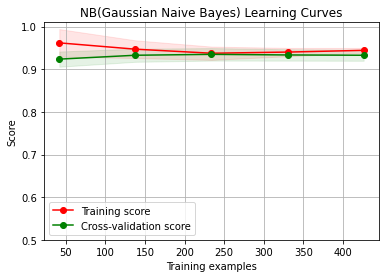

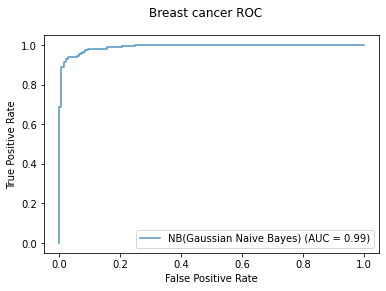


******************* MNB(多项式分布朴素贝叶斯) ********************
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
training took 0.001934s!
precision: 82.73%, recall: 99.14%, f1: 90.20%
accuracy: 86.70%

classification_report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79        72
           1       0.83      0.99      0.90       116

    accuracy                           0.87       188
   macro avg       0.90      0.83      0.85       188
weighted avg       0.89      0.87      0.86       188


confusion_matrix:
[[ 48  24]
 [  1 115]]
elaspe: 0.106150


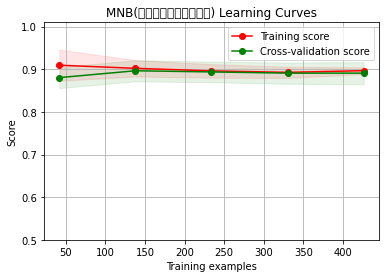

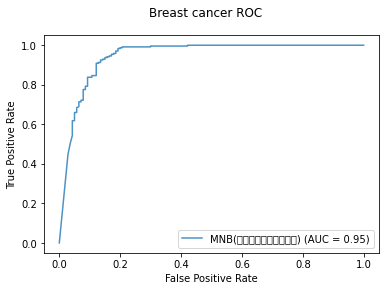


******************* KNN(KNN) ********************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
training took 0.002254s!
precision: 90.98%, recall: 95.69%, f1: 93.28%
accuracy: 91.49%

classification_report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        72
           1       0.91      0.96      0.93       116

    accuracy                           0.91       188
   macro avg       0.92      0.90      0.91       188
weighted avg       0.92      0.91      0.91       188


confusion_matrix:
[[ 61  11]
 [  5 111]]
elaspe: 0.877006


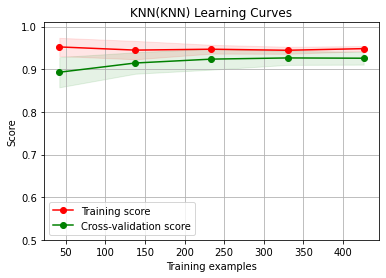

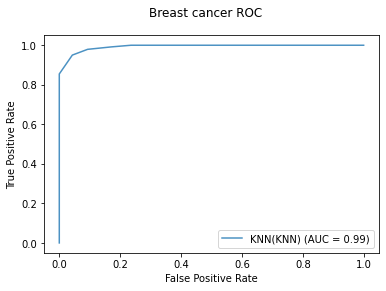


******************* LR(Logistic Regression) ********************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
training took 0.056764s!
precision: 92.50%, recall: 95.69%, f1: 94.07%
accuracy: 92.55%

classification_report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        72
           1       0.93      0.96      0.94       116

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188


confusion_matrix:
[[ 63   9]
 [  5 111]]
elaspe: 3.414056


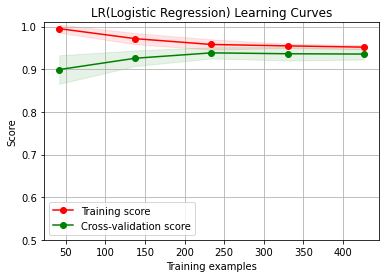

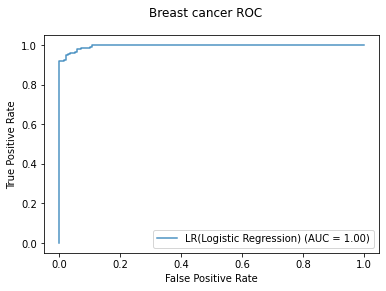


******************* RF(Random Forest) ********************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
training took 0.023227s!
precision: 92.62%, recall: 97.41%, f1: 94.96%
accuracy: 93.62%

classification_report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        72
           1       0.93      0.97      0.95       116

    accuracy                           0.94       188
   macro avg       0.94      0.92      0.93       188
weighted av

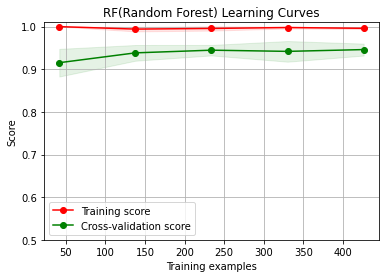

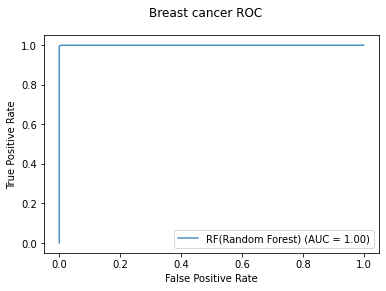


******************* DT(Decision Tree) ********************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
training took 0.007310s!
precision: 90.32%, recall: 96.55%, f1: 93.33%
accuracy: 91.49%

classification_report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.90      0.97      0.93       116

    accuracy                           0.91       188
   macro avg       0.92      0.90      0.91       188
weighted avg       0.92      0.91      0.91       188


confusion_matrix:
[[ 60  12]
 [  4 112]]
elaspe: 0.250378


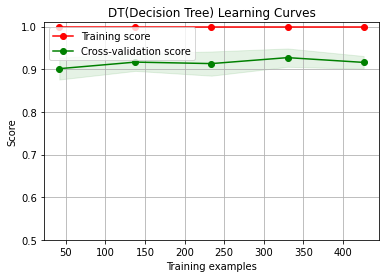

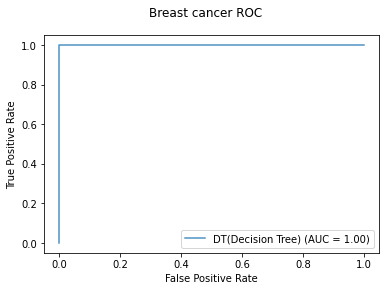


******************* SVM(Support Vector Machines) ********************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
training took 0.022861s!
precision: 83.94%, recall: 99.14%, f1: 90.91%
accuracy: 87.77%

classification_report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81        72
           1       0.84      0.99      0.91       116

    accuracy                           0.88       188
   macro avg       0.91      0.84      0.86       188
weighted avg       0.89      0.88      0.87       188


confusion_matrix:
[[ 50  22]
 [  1 115]]
elaspe: 0.667082


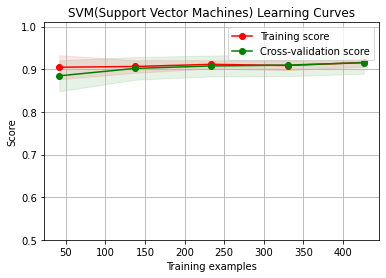

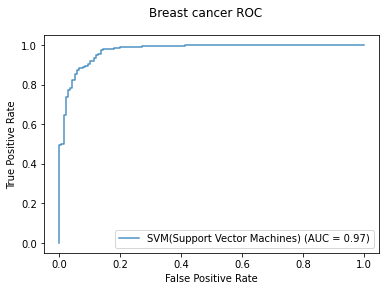


******************* GBDT(Gradient Boosting Decision Tree) ********************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
training took 0.509304s!
precision: 93.44%, recall: 98.28%, f1: 95.80%
accuracy: 94.68%

classification_report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        72
  

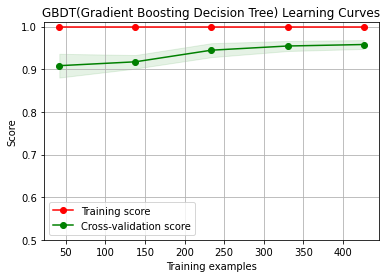

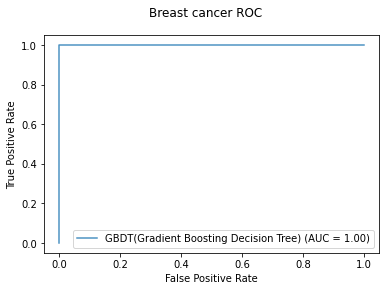


******************* Adaboost ********************
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                     

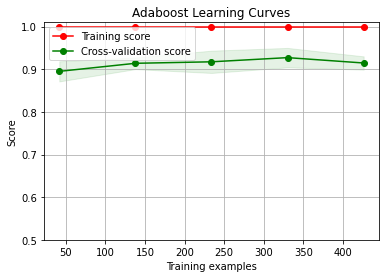

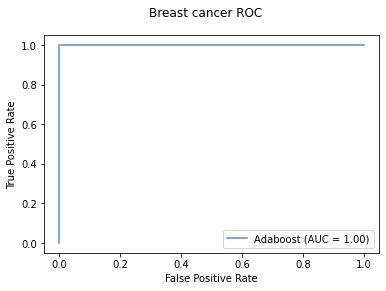


******************* Bagging ********************
BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                         

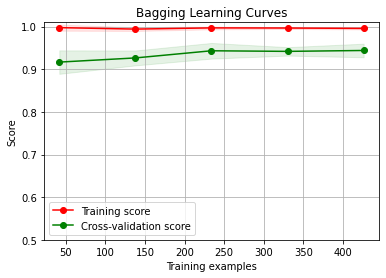

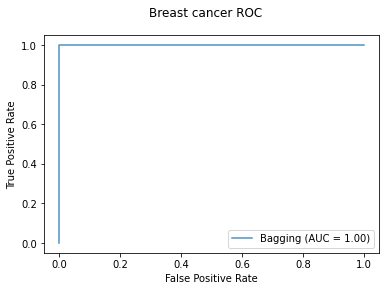

In [55]:
for classifier in test_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.time()
    model = classifiers[classifier](x_train, y_train)
    print(model)
    print('training took %fs!' % (time.time() - start_time))
    predict = model.predict(x_test)
#     if model_save_file != None: 
#         model_save[classifier] = model )
    score = metrics.precision_score(y_test, predict) 
    recall = metrics.recall_score(y_test, predict)
    f1 = metrics.f1_score(y_test, predict)
    print('precision: %.2f%%, recall: %.2f%%, f1: %.2f%%'% (100 * score, 100 * recall, 100*f1)) 
    accuracy = metrics.accuracy_score(y_test, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        y_test,   # array, Gound true (correct) target values
        predict,  # array, Estimated targets as returned by a classifier
        labels=[0,1],  # array, List of labels to index the matrix.
        sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
    )
    print('\nclassification_report:')
    print(classification_report( y_test,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    title = classifier+' Learning Curves'
    start = time.clock()
    plot_learning_curve(model,title,cancer.data, cancer.target, ylim=(0.5, 1.01), cv=cv)

    print('elaspe: {0:.6f}'.format(time.clock()-start))
    
    curve1 = plot_roc_curve(model, x_train, y_train,  alpha=0.8,name=classifier)
    curve1.figure_.suptitle("Breast cancer ROC")
    
    #画出决策树
    if classifier == 'DT(决策树)':
        dot_data = export_graphviz(model,
                                out_file = None,
                                # feature_names = iris_feature_name,
                                # class_names = iris_target_name,
                                filled=True,
                                rounded=True
                               )
        graph = pydotplus.graph_from_dot_data(dot_data)
        display(Image(graph.create_png()))
    plt.show()
    print()


# 参数调优

In [56]:
# KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#                          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
#                          weights='uniform')


# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)


# RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=None, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=8,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)


# #Decision Tree Classifier
# max_depth（树的深度）
# max_leaf_nodes（叶子结点的数目）
# max_features（最大特征数目）
# min_samples_leaf（叶子结点的最小样本数）
# min_samples_split（中间结点的最小样本树）
# min_weight_fraction_leaf（叶子节点的样本权重占总权重的比例）
# min_impurity_split（最小不纯净度）也可以调整

# DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                        max_depth=None, max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, presort='deprecated',
#                        random_state=None, splitter='best')
                       
# #[sklearn决策树之剪枝参数_数据结构与算法_The Zen of Data Analysis-CSDN博客](https://blog.csdn.net/gracejpw/article/details/102239574)  

# GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
#                            learning_rate=0.1, loss='deviance', max_depth=3,
#                            max_features=None, max_leaf_nodes=None,
#                            min_impurity_decrease=0.0, min_impurity_split=None,
#                            min_samples_leaf=1, min_samples_split=2,
#                            min_weight_fraction_leaf=0.0, n_estimators=200,
#                            n_iter_no_change=None, presort='deprecated',
#                            random_state=None, subsample=1.0, tol=0.0001,
#                            validation_fraction=0.1, verbose=0,
#                            warm_start=False)



# AdaBoostClassifier(algorithm='SAMME',  
#                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,  
#                                                          class_weight=None,  
#                                                          criterion='gini',  
#                                                          max_depth=None,  
#                                                          max_features=None,  
#                                                          max_leaf_nodes=None,  
#                                                          min_impurity_decrease=0.0,  
#                                                          min_impurity_split=None,  
#                                                          min_samples_leaf=1,  
#                                                          min_samples_split=2,  
#                                                          min_weight_fraction_leaf=0.0,  
#                                                          presort='deprecated',  
#                                                          random_state=None,  
#                                                          splitter='best'),  
#                    learning_rate=0.4, n_estimators=7, random_state=None)  



# BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
#                                                         class_weight=None,
#                                                         criterion='gini',
#                                                         max_depth=None,
#                                                         max_features=None,
#                                                         max_leaf_nodes=None,
#                                                         min_impurity_decrease=0.0,
#                                                         min_impurity_split=None,
#                                                         min_samples_leaf=1,
#                                                         min_samples_split=2,
#                                                         min_weight_fraction_leaf=0.0,
#                                                         presort='deprecated',
#                                                         random_state=None,
#                                                         splitter='best'),
#                   bootstrap=True, bootstrap_features=False, max_features=1.0,
#                   max_samples=1.0, n_estimators=10, n_jobs=None,
#                   oob_score=False, random_state=None, verbose=0,
#                   warm_start=False)



# SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
#     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
#     verbose=False)


In [57]:
def grid_search(model,param_grid,train_x,train_y,cv=5):
    grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs = -1, verbose=1) # cv:交叉验证参数，默认是None， 使用三折交叉验证，指定 fold数量， default = 3
    grid_search.fit(train_x, train_y) 
    best_parameters = grid_search.best_estimator_.get_params() 
#     for para, val in list(best_parameters.items()): 
#         print(para, val) 

    print('最优参数:',best_parameters)
    return grid_search.best_estimator_



In [58]:
# 调整参数的字典
common_classifiers = ['KNN(KNN)', 'LR(LogisticRegression)',  'DT(Decision Tree)', 'SVM(Support Vector Machines)' ] 
ensem_classifiers = ['RF(Random Forest)','GBDT(Gradient Boosting Decision Tree)','Adaboost']
basic_classifiers = {
    'KNN(KNN)':KNeighborsClassifier(),
    'LR(LogisticRegression)':LogisticRegression(penalty='l2'),
    'DT(Decision Tree)': DecisionTreeClassifier() ,
    'SVM(Support Vector Machines)': SVC(kernel='rbf', probability=True),
    'GBDT(Gradient Boosting Decision Tree)': GradientBoostingClassifier(n_estimators=200),
    'RF(Random Forest)': RandomForestClassifier(n_estimators=8) ,
    'Adaboost': AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME", n_estimators=7, learning_rate=0.4)
}
grid_params = {
    'KNN(KNN)':[
        {'weights':['uniform'],'n_neighbors':np.arange(4,8,1)},
        {'weights':['distance'],'n_neighbors':np.arange(4,8,1)},
    ],
    'LR(LogisticRegression)':[
        {'C':[0.01,0.1,1.0,10.0,100.0],'penalty':['l1']},
        {'C':[0.01,0.1,1.0,10.0,100.0],'penalty':['l2'],'solver':['liblinear','newton-cg','sag','lbfgs']},
    ],
    'DT(Decision Tree)':[
        {'min_samples_split':np.arange(1,15,1),'min_samples_leaf':np.arange(1,15,1),'splitter':['random']},
        {'min_samples_split':np.arange(1,15,1),'min_samples_leaf':np.arange(1,15,1),'splitter':['best']},
    ],
    'SVM(Support Vector Machines)':[
      {'C': [1e-1, 1, 10, 100, 1000], 'kernel': ['linear']},
      {'C': [1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ]
    
}

ensem_params = {
    'GBDT(Gradient Boosting Decision Tree)':{'n_estimators':np.arange(20,500,50),'max_depth':np.arange(3,14,2), 'min_samples_split':np.arange(2,10,2)},#'min_samples_split':list(range(800,1900,200)), 'min_samples_leaf':list(range(60,101,10))
    'RF(Random Forest)':{'n_estimators':np.arange(10,71,10),'max_depth':np.arange(3,14,2), 'min_samples_split':np.arange(80,150,20), 'min_samples_leaf':np.arange(10,60,10)},
    'Adaboost':{'n_estimators':np.arange(1,11,1),'learning_rate':np.arange(0.1,1,0.1)}
}


******************* KNN(KNN) ********************
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


最优参数: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
training took 1.034505s!
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')
precision: 90.98%, recall: 95.69%, f1: 93.28%
accuracy: 91.49%

classification_report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        72
           1       0.91      0.96      0.93       116

    accuracy                           0.91       188
   macro avg       0.92      0.90      0.91       188
weighted avg       0.92      0.91      0.91       188


confusion_matrix:
[[ 61  11]
 [  5 111]]



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.0s finished


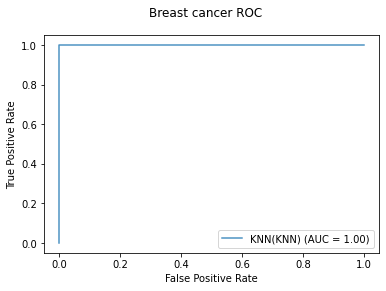

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


******************* LR(LogisticRegression) ********************
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.1s finished


最优参数: {'C': 100.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
training took 3.272812s!
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
precision: 92.62%, recall: 97.41%, f1: 94.96%
accuracy: 93.62%

classification_report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        72
           1       0.93      0.97      0.95       116

    accuracy                           0.94       188
   macro avg       0.94      0.92      0.93      

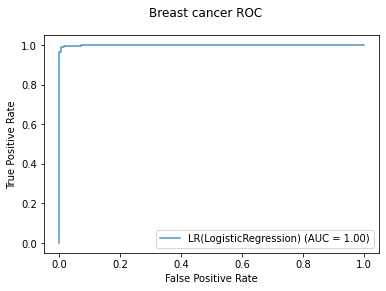

******************* DT(Decision Tree) ********************
Fitting 5 folds for each of 392 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed:    3.9s


最优参数: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
training took 4.241327s!
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
precision: 88.80%, recall: 95.69%, f1: 92.12%
accuracy: 89.89%

classification_report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        72
           1  

[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed:    4.2s finished


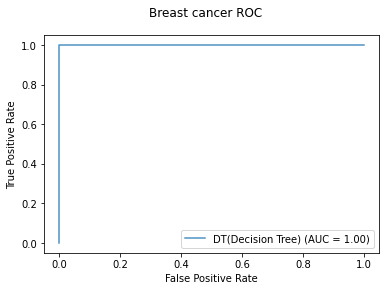

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


******************* SVM(Support Vector Machines) ********************
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.5min finished


最优参数: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
training took 312.988328s!
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
precision: 91.13%, recall: 97.41%, f1: 94.17%
accuracy: 92.55%

classification_report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        72
           1       0.91      0.97      0.94       116

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188


confusion_matrix:


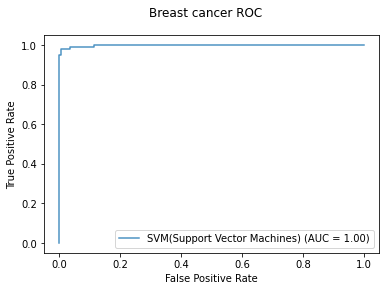

In [59]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
for classifier in common_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.time()
    model = basic_classifiers[classifier]
    clf = grid_search(model,grid_params[classifier],x_train,y_train,cv=5) 
    print('training took %fs!' % (time.time() - start_time))
    print(clf)
    clf.fit(x_train,y_train)
    predict = clf.predict(x_test)

    score = metrics.precision_score(y_test, predict) 
    recall = metrics.recall_score(y_test, predict)
    f1 = metrics.f1_score(y_test, predict)
    print('precision: %.2f%%, recall: %.2f%%, f1: %.2f%%' % (100 * score, 100 * recall, 100*f1)) 
    accuracy = metrics.accuracy_score(y_test, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        y_test,   # array, Gound true (correct) target values
        predict,  # array, Estimated targets as returned by a classifier
        labels=[0,1],  # array, List of labels to index the matrix.
        sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
    )
    print('\nclassification_report:')
    print(classification_report( y_test,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)
    print()
    curve1 = plot_roc_curve(clf, x_train, y_train,  alpha=0.8,name=classifier)
    curve1.figure_.suptitle("Breast cancer ROC")
    plt.show()



# 集成学习调参

******************* RF(Random Forest) ********************
Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  3.9min finished


最优参数: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 20, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
training took 231.181462s!
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
p

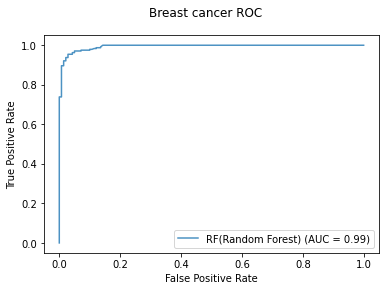

******************* GBDT(Gradient Boosting Decision Tree) ********************
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  4.9min finished


最优参数: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 70, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
training took 296.407842s!
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_it

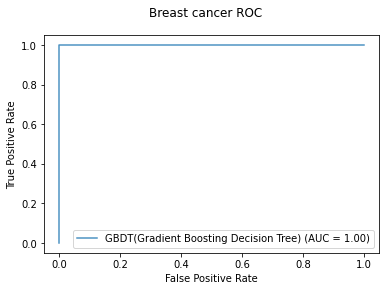

******************* Adaboost ********************
Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    2.3s finished


最优参数: {'algorithm': 'SAMME', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_

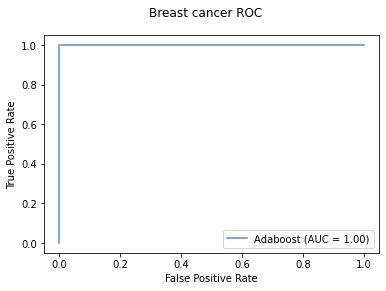

In [62]:
for classifier in ensem_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.time()
    model = basic_classifiers[classifier]
    clf = grid_search(model,ensem_params[classifier],x_train,y_train,cv=5) 
    print('training took %fs!' % (time.time() - start_time))
    print(clf)
    clf.fit(x_train,y_train)
    predict = clf.predict(x_test)

    score = metrics.precision_score(y_test, predict) 
    recall = metrics.recall_score(y_test, predict)
    f1 = metrics.f1_score(y_test, predict)
    print('precision: %.2f%%, recall: %.2f%%, f1: %.2f%%' % (100 * score, 100 * recall, 100*f1)) 
    accuracy = metrics.accuracy_score(y_test, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        y_test,   # array, Gound true (correct) target values
        predict,  # array, Estimated targets as returned by a classifier
        labels=[0,1],  # array, List of labels to index the matrix.
        sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
    )
    print('\nclassification_report:')
    print(classification_report( y_test,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)

    print()
    curve1 = plot_roc_curve(clf, x_train, y_train,  alpha=0.8,name=classifier)
    curve1.figure_.suptitle("Breast cancer ROC")
    plt.show()
